In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from scipy.optimize import curve_fit
import warnings
import json
from helper_functions import find_dips_robust, find_index
from wafer_plot import draw_wafer_plot

warnings.filterwarnings('ignore')

59
[-0.02316616, 0.3274668, 0.6744198, 1.000226, 1.3054999999999999, 1.584009, 1.837872, 2.070339, 2.275277, 2.4575519999999997, 2.6219770000000002, 2.76448, 2.891828, 3.001039, 3.095794, 3.178565, 3.248225, 3.30776, 3.35751, 3.40083, 3.439536, 3.473307, 3.505067, 3.536576, 3.5718550000000002, 3.615357, 3.669858, 3.744245, 3.852441, 4.023147, 4.665961, 4.658897, 4.74846, 4.7954989999999995, 4.677638, 4.787517, 2.432e-07, 2.4850000000000003e-07, 2.684e-07, 3.153e-07, 3.6340000000000004e-07, 4.277e-07, 5.246e-07, 5.497e-07, 7.576000000000001e-07, 8.568e-07, 1.8180000000000002e-06, 1e-06, 1.1318000000000001e-06, 2.8517e-06, 1.4255e-06]
[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6, 5.8, 6.0, 6.2, 6.4, 6.6, 6.8, 7.0, 7.2, 7.4, 7.6, 7.8, 8.0, 8.2, 8.4, 8.6, 8.8, 9.0, 9.2, 9.4, 9.6, 9.8, 10.0]


Text(0.5, 1.0, 'Reticle 59, device 43')

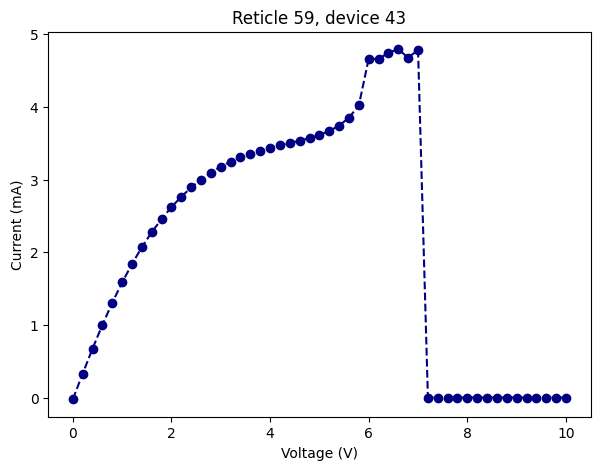

In [7]:
# MacBook
root_path = Path('/Users/jiahaozhan/Google Drive/Other Computers/CM300/Dione_wafer3_BO')
data_path = root_path / 'xps_data' / 'therm_phase_si_crossing_test_cells_heater_reliability'

no = 0
data_dir_gen = sorted(data_path.glob(f'reticle59/*.json'))
for d in data_dir_gen:
    df = pd.read_json(d)
    # print(df.columns)
    ret = int(df['reticle'][no])
    print(ret)
    
    wavel = df['wavelength'][no]
    trans = df['transmission_ch1'][no]
    volts = df['smu_voltage'][no]
    currs = df['smu_current'][no]

elec_pwrs = np.multiply(volts, currs)
res = np.divide(volts[1:], np.divide(currs[1:], 1000))

print(currs)
print(volts)

# plot IV curve
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(volts, currs, 'o--', color='navy')
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (mA)')
ax.set_title(f'Reticle {ret}, device 43')
# ax.legend()
# ax.set_xlim([wl_l, wl_u])

(1305.0, 1312.0)

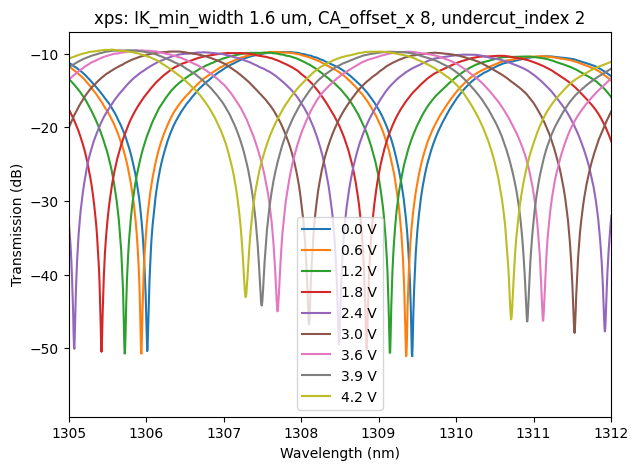

In [7]:
# plot tranmission spectra at different voltages
title = f"xps: IK_min_width {df['IK_min_width'][no]} um, CA_offset_x {df['CA_offset_x'][no]}, undercut_index {df['index'][no]}"
wl_l, wl_u = 1305, 1312

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
for i in [0,2,4,6,8,10,12,13,14]:
    ax.plot(wavel, trans[i], label=f'{volts[i]:.2} V')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dB)')
ax.set_title(title)
ax.legend()
ax.set_xlim([wl_l, wl_u])
# ax.text(xlim[1]-2, -61, '$P_{\pi}$ = ' + f'{P_pi:.2f} mW', fontsize=12)